# Pymaceuticals Data Analysis

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = os.path.join('data', 'Mouse_metadata.csv')
study_results_path = os.path.join('data', 'Study_results.csv')

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
study_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
study_data_complete['Mouse ID'].value_counts()

g989    13
d251    10
i334    10
t198    10
l471    10
        ..
x336     1
f932     1
n482     1
v199     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

duplicate_mouse_ids[0]

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids_data = study_data_complete.loc[study_data_complete['Mouse ID'] == 'g989']

# Displays data frame
duplicate_mouse_ids_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]

# Displays data frame
clean_study_data_complete.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_study_data_complete['Mouse ID'].value_counts()

e227    10
t724    10
i334    10
t198    10
l471    10
        ..
u153     1
x226     1
v199     1
o848     1
t573     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Groups the clean data by drug regimen
regimen_grouped_data = clean_study_data_complete.groupby(['Drug Regimen'])

# Calculates the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol_mean = regimen_grouped_data['Tumor Volume (mm3)'].mean()
tumor_vol_median = regimen_grouped_data['Tumor Volume (mm3)'].median()
tumor_vol_var = regimen_grouped_data['Tumor Volume (mm3)'].var()
tumor_vol_std = regimen_grouped_data['Tumor Volume (mm3)'].std()
tumor_vol_sem = regimen_grouped_data['Tumor Volume (mm3)'].sem()

# Creates a summary statistics table with the values calculated above
summary_stats_table = pd.DataFrame({'Mean of Tumor Volume (mm3)': tumor_vol_mean,
                                    'Median of Tumor Volume (mm3)': tumor_vol_median,
                                    'Variance of Tumor Volume (mm3)': tumor_vol_var,
                                    'Std. Dev. of Tumor Volume (mm3)': tumor_vol_std,
                                    'SEM of Tumor Volume (mm3)': tumor_vol_sem})

# Displays data frame
summary_stats_table

,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume (mm3),Std. Dev. of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

simpler_summary_stats_table = clean_study_data_complete.groupby(['Drug Regimen']).agg({
    
                                                        'Tumor Volume (mm3)': ['mean','median','var','std','sem']
                                                                                    
                                                                                        })
# Displays table
simpler_summary_stats_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

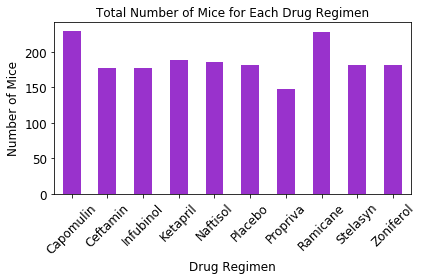

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Count the number of mice for each drug regimen
regimen_count = regimen_grouped_data['Drug Regimen'].count()

# Create a bar plot for the regimen_count data and set the title of the plot
regimen_count_bar = regimen_count.plot(kind='bar', title='Total Number of Mice for Each Drug Regimen', fontsize=12, 
                                       color='darkorchid', rot=45)

# Set the x and y labels
regimen_count_bar.set_xlabel('Drug Regimen', fontsize=12)
regimen_count_bar.set_ylabel('Number of Mice', fontsize=12)

# Save and show the graph
plt.tight_layout()
plt.savefig('images/pandas_bar.png')
plt.show()

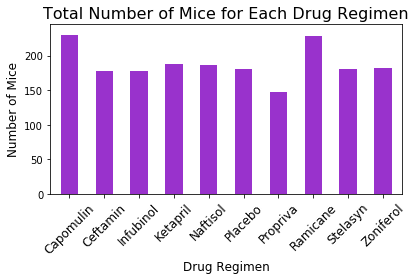

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(regimen_count))
tick_locations = [value for value in x_axis]

# Create bar plot
plt.bar(x_axis, regimen_count, color='darkorchid', align='center', width=.5)

# Set x axis ticks names to regimen names 
plt.xticks(tick_locations, regimen_count.index, fontsize=12, rotation=45)

# Set x and y limits
plt.xlim(-0.55, len(x_axis)-0.45)
plt.ylim(0, max(regimen_count)+15)

# Set a Title and labels
plt.title('Total Number of Mice for Each Drug Regimen', fontsize=16)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Number of Mice', fontsize=12)

# Save and show the graph
plt.tight_layout()
plt.savefig('images/pyplot_bar.png')
plt.show()

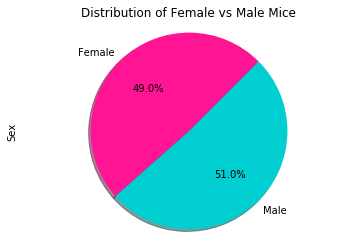

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Groups the clean data by sex
sex_grouped_data = clean_study_data_complete.groupby(['Sex'])

# Counts the number of mice in each sex
sex_count = sex_grouped_data['Sex'].count()

# Creates the pie chart using pandas .plot() function which 
# automatically sets the title and finds the percentages of each part of the pie chart
sex_count.plot(kind='pie', title='Distribution of Female vs Male Mice', startangle=45,
               autopct='%1.1f%%', shadow=True, colors=['deeppink','darkturquoise'])

# Tells matplotlib that we want a pie chart with equal axes
plt.axis('equal')
 
# Save and show the graph
plt.savefig('images/pandas_pie.png')
plt.show()

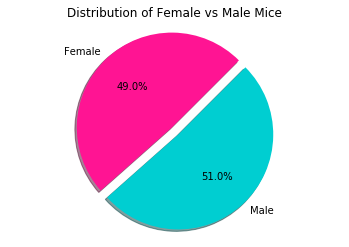

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of the pie chart
labels = ['Female', 'Male']

# The colors of each section of the pie chart
colors = ['deeppink','darkturquoise']

# Tells matplotlib to seperate the "Female" section from the "Male" section
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sex_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)

# Set the title
plt.title('Distribution of Female vs Male Mice')

# Tells matplotlib that we want a pie chart with equal axes
plt.axis('equal')

# Save and show the graph
plt.savefig('images/pyplot_pie.png')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
## I couldn't figure out how to merge the groupby data frame with the orginial data frame, so went with this method
## which is pretty messy

## Code I used to make sure the timepoints_df logic actually works 
## grouped_data = clean_study_data_complete.groupby('Mouse ID')["Timepoint"].max()
## grouped_data['l872']

# Data Frame that sorts the timepioints in descending order
# Then drops all of the duplicate mouse ids
timepoint_df = clean_study_data_complete.sort_values('Timepoint', ascending=False).drop_duplicates('Mouse ID').reset_index()
timepoint_df = timepoint_df.drop(columns='index')
## timepoint_df

# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Drops the drug regimens that are not in the regimen_list
specific_regimens = timepoint_df[timepoint_df['Drug Regimen'].isin(regimen_list)]

# Creates a data frame that is indexed by drug regimen then by mouse id
# which has the last (greatest) timepoint for each mouse
specific_regimens = pd.DataFrame(specific_regimens.groupby(['Drug Regimen','Mouse ID'])['Tumor Volume (mm3)'].max())

# Reshaping the data frame so that the indexes are the mouse id and the tumor volume and,
# every drug regimen that we want to look at has its own column, so it is easier to grab the data from the data frame
specific_regimens_reshaped = specific_regimens.stack(level=0).unstack(level=0)

# Code to check if the multi-index data frame actually stores the data that I wanted
# specific_regimens_reshaped.loc[('k403','Tumor Volume (mm3)')]

# Display the reshaped data frame
specific_regimens_reshaped

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Tumor Volume (mm3),NaN,NaN,67.973419,NaN
a251,Tumor Volume (mm3),NaN,NaN,65.525743,NaN
a275,Tumor Volume (mm3),NaN,62.999356,NaN,NaN
a411,Tumor Volume (mm3),NaN,NaN,NaN,38.407618
a444,Tumor Volume (mm3),NaN,NaN,NaN,43.047543
...,...,...,...,...,...
y769,Tumor Volume (mm3),NaN,68.594745,NaN,NaN
y793,Tumor Volume (mm3),31.896238,NaN,NaN,NaN
y865,Tumor Volume (mm3),NaN,64.729837,NaN,NaN


In [14]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in regimen_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = specific_regimens_reshaped[regimen].quantile([.25,.5,.75])
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'The upper quartile of {regimen} Tumor Volume is: {upperq}(mm3)')
    print(f'The interquartile range of {regimen} Tumor Volume is: {iqr}(mm3)')
    print(f'The the median of {regimen} Tumor Volume is: {quartiles[0.5]}(mm3)')
    
    # add subset 
    tumor_vol_data.append(specific_regimens_reshaped[regimen].dropna())
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Tumor Volume values below {lower_bound}(mm3) could be outliers.')
    print(f'Tumor Volume values above {upper_bound}(mm3) could be outliers.')
    print('------------------------------------------------')

## Code to see what is stored in the tumor_vol_data list and if that is what I really want
## print(tumor_vol_data)

The upper quartile of Capomulin Tumor Volume is: 40.1592203(mm3)
The interquartile range of Capomulin Tumor Volume is: 7.781863460000004(mm3)
The the median of Capomulin Tumor Volume is: 38.125164399999996(mm3)
Tumor Volume values below 20.70456164999999(mm3) could be outliers.
Tumor Volume values above 51.83201549(mm3) could be outliers.
------------------------------------------------
The upper quartile of Ramicane Tumor Volume is: 40.65900627(mm3)
The interquartile range of Ramicane Tumor Volume is: 9.098536719999998(mm3)
The the median of Ramicane Tumor Volume is: 36.56165229(mm3)
Tumor Volume values below 17.912664470000003(mm3) could be outliers.
Tumor Volume values above 54.30681135(mm3) could be outliers.
------------------------------------------------
The upper quartile of Infubinol Tumor Volume is: 65.52574285(mm3)
The interquartile range of Infubinol Tumor Volume is: 11.477135160000003(mm3)
The the median of Infubinol Tumor Volume is: 60.16518046(mm3)
Tumor Volume values be

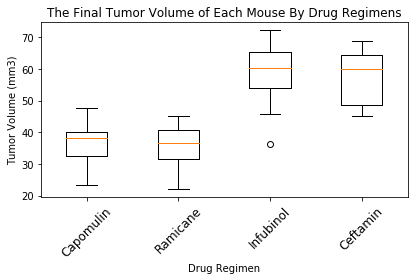

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('The Final Tumor Volume of Each Mouse By Drug Regimens')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, labels=regimen_list)
plt.xticks(fontsize= 12, rotation=45)

# Save and show the graph
plt.tight_layout()
plt.savefig('images/pyplot_box.png')
plt.show()

## Line and Scatter Plots

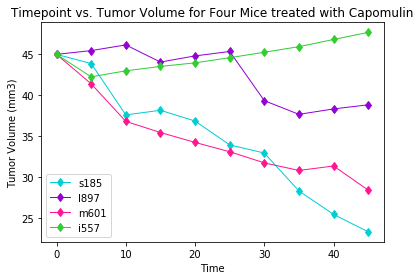

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# I am assuming that the line plot is looking at all of the tumor volume values over timepoint for each mice
capomulin_data = clean_study_data_complete[clean_study_data_complete['Drug Regimen'] == 'Capomulin']

# Data to create a line plot of time point versus tumor volume for 4 mice treated with Capomulin
capomulin_data_s185 = capomulin_data.loc[capomulin_data['Mouse ID'] == 's185']
s185_time = capomulin_data_s185['Timepoint'].to_list()
s185_tumor = capomulin_data_s185['Tumor Volume (mm3)'].to_list()

capomulin_data_l897 = capomulin_data.loc[capomulin_data['Mouse ID'] == 'l897']
l897_time = capomulin_data_l897['Timepoint'].to_list()
l897_tumor = capomulin_data_l897['Tumor Volume (mm3)'].to_list()

capomulin_data_m601 = capomulin_data.loc[capomulin_data['Mouse ID'] == 'm601']
m601_time = capomulin_data_m601['Timepoint'].to_list()
m601_tumor = capomulin_data_m601['Tumor Volume (mm3)'].to_list()

capomulin_data_i557 = capomulin_data.loc[capomulin_data['Mouse ID'] == 'i557']
i557_time = capomulin_data_i557['Timepoint'].to_list()
i557_tumor = capomulin_data_i557['Tumor Volume (mm3)'].to_list()

# Create a handle for each plot
s185, = plt.plot(s185_time, s185_tumor, marker='d',color='darkturquoise', linewidth=1, label='s185')
l897, = plt.plot(l897_time, l897_tumor, marker='d',color='darkviolet', linewidth=1, label='l897')
m601, = plt.plot(m601_time, m601_tumor, marker='d',color='deeppink', linewidth=1, label='m601')
i557, = plt.plot(i557_time, i557_tumor, marker='d',color='limegreen', linewidth=1, label='i557')

# Set the legend to where the chart thinks is best
plt.legend(handles=[s185, l897, m601, i557], loc="best")

# Create title and labels for the x and y axis
plt.title('Timepoint vs. Tumor Volume for Four Mice treated with Capomulin')
plt.xlabel('Time')
plt.ylabel('Tumor Volume (mm3)')

# Save and show the graph
plt.tight_layout()
plt.savefig('images/pyplot_line.png')
plt.show()

## capomulin_data['Mouse ID'].unique()
## ['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
##       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
##        'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
##       'r157']

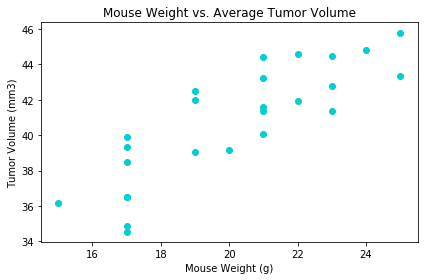

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Group the Capomulin data by mouse id
capomulin_data_id_group = capomulin_data.groupby(['Mouse ID'])

# Find the avergae tumor volume for each mouse 
avg_tumor_vol = capomulin_data_id_group['Tumor Volume (mm3)'].mean()

# Get the weight of each mouse
avg_mouse_weight = capomulin_data_id_group['Weight (g)'].mean()

# Create a data frame with the values above
capomulin_weight_tumorvol = pd.DataFrame({'Mouse Weight (g)': avg_mouse_weight,
                                          'Average Tumor Volume (mm3)': avg_tumor_vol})
##capomulin_weight_tumorvol

x_values = capomulin_weight_tumorvol['Mouse Weight (g)']
y_values = capomulin_weight_tumorvol['Average Tumor Volume (mm3)']

# Create a scatter plot based on the capomulin_weight_tumorvol data frame
plt.scatter(x_values, y_values, marker='o', facecolors='darkturquoise', edgecolors='darkturquoise')

# Create a title and labels for x and y axis
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# Save and show the graph
plt.tight_layout()
plt.savefig('images/pyplot_scatter.png')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


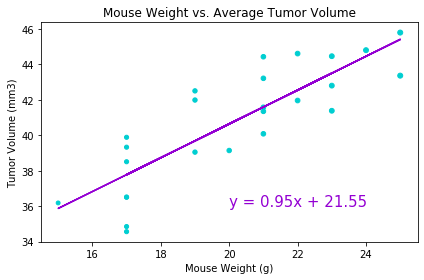

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_values, y_values)[0]
print(f'The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation,2)}')

# Perform a linear regression on mouse weight vs. average tumor volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Create equation of line to calculate predicted 
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

# Create a scatter plot based on the capomulin_weight_tumorvol data frame
plt.scatter(x_values, y_values, marker='o', facecolors='darkturquoise', edgecolors='darkturquoise', s=x_values)

# Add the linear regression equation and line to plot on top of the scatter plot
plt.plot(x_values, regress_values, color='darkviolet')
plt.annotate(line_eq, (20, 36), fontsize=15, color='darkviolet')

# Create a title and labels for x and y axis
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# Save and show the graph
plt.tight_layout()
plt.savefig('images/pyplot_correlation_regression.png')
plt.show()